## Cycle Detection

### Given a directed graph detect if there is a cycle

In [22]:
class Graph:
    def __init__(self, node_list):
        self.node_list = node_list
    
    def add_node(self, node):
        self.node_list.append(node)

class Node:
    def __init__(self, neighbors, data):
        self.neighbors = neighbors
        self.data = data
    
    def add_neighbor(self, node):
        self.neighbors.append(node)

In [2]:
node1 = Node([],1)
node2 = Node([],2)
node3 = Node([],3)
node4 = Node([],4)
node5 = Node([],5)

node1.neighbors = [node2, node3]
node2.neighbors = [node5]
node5.neighbors = [node4]
node4.neighbors = [node2, node3]

graph = Graph([node1, node2, node3, node4, node5])

In [4]:
def has_cycle(graph):
    state = {}
    for node in graph.node_list:
        if node not in state and has_cycle_dfs(node, state):
            return True
    return False

def has_cycle_dfs(node, state):
    state[node] = 'visiting'
    for neighbor in node.neighbors:
        if neighbor not in state and has_cycle_dfs(neighbor, state):
            return True
        elif state[neighbor] == 'visiting':
            return True
    state[node] = 'visited'
    return False
        
has_cycle(graph)        

True

### Course Schedule
There are a total of n courses you have to take, labeled from 0 to n-1.

Some courses may have prerequisites, for example to take course 0 you have to first take course 1, which is expressed as a pair: [0,1]

Given the total number of courses and a list of prerequisite pairs, is it possible for you to finish all courses?

* Input: 2, [[1,0]] 
* Output: true
* Explanation: There are a total of 2 courses to take. To take course 1 you should have finished course 0. So it is possible.

In [2]:
class Solution:
    def canFinish(self, numCourses, prerequisites):
        from collections import defaultdict
        self.adjlist = defaultdict(list)
        for x,y in prerequisites:
            self.adjlist[y].append(x)

        state = {}
        for node in range(numCourses):
            if node not in state and self.has_cycle(node, state):
                return False
        return True
    
    def has_cycle(self, node, state):
        state[node] = 'visiting'
        for neighbor in self.adjlist[node]:
            if neighbor not in state and self.has_cycle(neighbor, state):
                return True
            elif state[neighbor] == 'visiting':
                return True
        state[node] = 'visited'
        return False
    
obj = Solution()
obj.canFinish(4, [[1,0],[2,0],[3,1],[3,2]])       

True

### Course Schedule II
There are a total of n courses you have to take, labeled from 0 to n-1.

Some courses may have prerequisites, for example to take course 0 you have to first take course 1, which is expressed as a pair: [0,1]

Given the total number of courses and a list of prerequisite pairs, return the ordering of courses you should take to finish all courses.
* Input: 4, [[1,0],[2,0],[3,1],[3,2]]
* Output: [0,1,2,3] or [0,2,1,3]

In [23]:
class Solution:
    def findOrder(self, numCourses, prerequisites):
        from collections import defaultdict
        self.adjlist = defaultdict(list)
        for x,y in prerequisites:
            self.adjlist[y].append(x)
        
        state = {}; result = []
        for node in range(numCourses):
            if node not in state and self.has_cycle(node, state, result):
                return []
        return result
    
    def has_cycle(self, node, state, result):
        state[node] = 'visiting'
        for neighbor in self.adjlist[node]:
            if neighbor not in state and self.has_cycle(neighbor, state, result):
                return True
            elif state[neighbor] == 'visiting':
                return True
        state[node] = 'visited'
        result.insert(0,node)
        return False
    
obj = Solution()
obj.findOrder(4, [[1,0],[2,0],[3,1],[3,2]])

[0, 2, 1, 3]

### Designations ordering
Consider a vector of employees with a name and their title:
[<John, Manager>, <Sally, CTO>, <Sam, CEO>, <Drax, Engineer>, <Bob, CFO>, <Daniel, Engineer>]

And a dictionary where the keys report to the values:
{[CTO, CEO], [Manager, CTO], [Engineer, Manager], [CFO, CEO]}

Re-order the vector of employees according to the dictionary mappings. The vector of employees can be extremely big, however the dictionary only contains the title orderings.

Sample output:
[<Drax, Engineer>, <Daniel, Engineer>, <John, Manager>, <Sally, CTO>, <Bob, CFO>, <Sam, CEO>]

Note that in this case, CTO and CFO both report to CEO so they are both before CEO and above the next biggest thing, which is manager. They can also be in either order in this case.

In [4]:
def ordering(title, reports_to):
    from collections import defaultdict
    subordinates = defaultdict(list)
    designations = defaultdict(list)
    heirarchy = []; state = {}; unique_positions = set(); stack = []
    for key, val in reports_to.items():
        subordinates[val].append(key)
        unique_positions.add(val)
        unique_positions.add(key)
        
    for name, position in title:
        designations[position].append(name)
    
    for node in unique_positions:
        if node not in state:
            dfs(node, subordinates, state, stack)
            
    queue = [stack[-1]]
    while queue:
        node = queue.pop(0)
        heirarchy.append(node)
        for subordinate in subordinates[node]:
            queue.append(subordinate)
    
    heirarchy = heirarchy[::-1]
    print(heirarchy)
    ans = []
    for position in heirarchy:
        for name in designations[position]:
            ans.append((name, position))
    
    return ans
        
def dfs(node, subordinates, state, stack):
    state[node] = 'visiting'
    for subordinate in subordinates[node]:
        if subordinate not in state:
            dfs(subordinate, subordinates, state, stack)
    
    state[node] = 'visited'
    stack.append(node)

In [5]:
title = [('Malhar', 'Chairman'), ('John', 'Manager'), ('Sally', 'CTO'), ('Sam', 'CEO'), ('Drax', 'Engineer'), 
         ('Bob', 'CFO'), ('Daniel', 'Engineer'), ('Kushal', 'President')]

reports_to = {'Manager':'CTO', 'Engineer':'Manager', 'CFO':'CEO', 'CEO':'President', 
              'CTO':'CEO', 'President':'Chairman'}
ordering(title, reports_to)

['Engineer', 'Manager', 'CTO', 'CFO', 'CEO', 'President', 'Chairman']


[('Drax', 'Engineer'),
 ('Daniel', 'Engineer'),
 ('John', 'Manager'),
 ('Sally', 'CTO'),
 ('Bob', 'CFO'),
 ('Sam', 'CEO'),
 ('Kushal', 'President'),
 ('Malhar', 'Chairman')]

## Bipartite Graph

### Possible Bipartion

Given a set of N people (numbered 1, 2, ..., N), we would like to split everyone into two groups of any size.

Each person may dislike some other people, and they should not go into the same group. 

Formally, if dislikes[i] = [a, b], it means it is not allowed to put the people numbered a and b into the same group.

Return true if and only if it is possible to split everyone into two groups in this way.

* Input: N = 4, dislikes = [[1,2],[1,3],[2,4]]
* Output: true
* Explanation: group1 [1,4], group2 [2,3]

In [17]:
class Solution:
    def possibleBipartition(self, N, dislikes):
        from collections import defaultdict
        self.adjlist = defaultdict(list)
        for x, y in dislikes:
            self.adjlist[x].append(y)
            self.adjlist[y].append(x)
        state = {}; group1 = []; group2 = []
        for node in range(1,N+1):
            if node not in state :
                groups = self.get_bipartite_groups(node, state)
                if groups is None:
                    return []
                group1 += groups[0]
                group2 += groups[1]
        return group1, group2 
    
    def get_bipartite_groups(self, node, state):
        state[node] = 'visiting'; level = {node:0}; queue = [node]; even = []; odd = []
        
        while len(queue):
            curr = queue.pop(0)
            if level[curr]%2==0:
                even.append(curr)
            else:
                odd.append(curr)
            for neighbor in self.adjlist[curr]:
                if neighbor not in state:
                    state[neighbor] = 'visiting'
                    level[neighbor] = level[curr] + 1
                    queue.append(neighbor)
                elif level[neighbor] == level[curr]:
                    return None
            state[curr] = 'visited'
        return even, odd

In [20]:
obj = Solution()
obj.possibleBipartition(4, [[1,2],[1,3],[2,4]])

([1, 4], [2, 3])

### Is Graph Bipartite?
Given an undirected graph, return true if and only if it is bipartite.

Recall that a graph is bipartite if we can split it's set of nodes into two independent subsets A and B such that every edge in the graph has one node in A and another node in B.

The graph is given in the following form: graph[i] is a list of indexes j for which the edge between nodes i and j exists.  Each node is an integer between 0 and graph.length - 1.  There are no self edges or parallel edges: graph[i] does not contain i, and it doesn't contain any element twice.

* Input: [[1,3], [0,2], [1,3], [0,2]]
* Output: true
* Explanation: 
* We can divide the vertices into two groups: {0, 2} and {1, 3}.

In [5]:
class Solution:
    def isBipartite(self, graph):
        state = {}
        for node in range(len(graph)):
            if node not in state and self.not_bipartite(node, state, graph):
                return False
        return True
    
    def not_bipartite(self, node, state, graph):
        level = {node:0}; state[node] = 'visiting'; queue = [node]
        while len(queue):
            curr = queue.pop(0)
            for neighbor in graph[curr]:
                if neighbor not in state:
                    state[neighbor] = 'visiting'
                    level[neighbor] = level[curr]+1
                    queue.append(neighbor)
                elif level[neighbor] == level[curr]:
                    return True
            state[curr] = 'visited'
        return False
                
obj = Solution()
obj.isBipartite([[1,3], [0,2], [1,3], [0,2]])

True

## Connected Components in undirected Graph

### Given a graph, mark each connected component with a different color


In [23]:
node1 = Node([],1)
node2 = Node([],2)
node3 = Node([],3)
node4 = Node([],4)
node5 = Node([],5)
node6 = Node([],6)
node7 = Node([],7)
node8 = Node([],8)

node1.neighbors = [node2, node3]
node2.neighbors = [node4]
node3.neighbors = [node4, node5, node6]
node4.neighbors = [node6]
node5.neighbors = [node6]
node7.neighbors = [node8]

graph = Graph([node1, node2, node3, node4, node5, node6, node7, node8])

In [28]:
def color_graph(graph):
    color = {}; state = {}; color_val = 0
    for node in graph.node_list:
        if node not in state:
            dfs_visit(node, color, state, color_val)
            color_val += 1
    return color

def dfs_visit(node, color, state, color_val):
    state[node] = 'visiting'
    color[node] = color_val
    
    for neighbor in node.neighbors:
        if neighbor not in state:
            dfs_visit(neighbor, color, state, color_val)
    state[node] = 'visited'

In [30]:
color = color_graph(graph)
color

{<__main__.Node at 0x7fa8dc21a2e8>: 0,
 <__main__.Node at 0x7fa8dc21a2b0>: 0,
 <__main__.Node at 0x7fa8dc21a358>: 0,
 <__main__.Node at 0x7fa8dc21a3c8>: 0,
 <__main__.Node at 0x7fa8dc21a320>: 0,
 <__main__.Node at 0x7fa8dc21a390>: 0,
 <__main__.Node at 0x7fa8dc21a400>: 1,
 <__main__.Node at 0x7fa8dc21a438>: 1}

### Number of Connected Components in an Undirected Graph
Given n nodes labeled from 0 to n - 1 and a list of undirected edges (each edge is a pair of nodes), write a function to find the number of connected components in an undirected graph.

n = 5 and edges = [[0, 1], [1, 2], [3, 4]]

     0          3
     |          |
     1 --- 2    4 

Output: 2

In [8]:
class Solution:
    def countComponents(self, n, edges):
        from collections import defaultdict
        self.adjlist = defaultdict(list)
        for x,y in edges:
            self.adjlist[x].append(y)
            self.adjlist[y].append(x)
        
        state = {}; count = 0
        for node in range(n):
            if node not in state:
                self.dfs_visit(node, state)
                count += 1
        return count
    
    def dfs_visit(self, node, state):
        state[node] = 'visiting'
        for neighbor in self.adjlist[node]:
            if neighbor not in state:
                self.dfs_visit(neighbor, state)
        state[node] = 'visited'

obj = Solution()
obj.countComponents(5, [[0, 1], [1, 2], [3, 4]])

2

### Number of Operations to Make Network Connected
There are n computers numbered from 0 to n-1 connected by ethernet cables connections forming a network where connections[i] = [a, b] represents a connection between computers a and b. Any computer can reach any other computer directly or indirectly through the network.

Given an initial computer network connections. You can extract certain cables between two directly connected computers, and place them between any pair of disconnected computers to make them directly connected. Return the minimum number of times you need to do this in order to make all the computers connected. If it's not possible, return -1. 

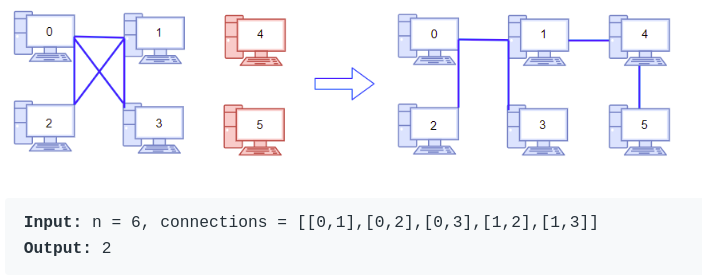

In [4]:
class Solution:
    def makeConnected(self, n: int, connections) -> int:
        if len(connections) < n-1:
            return -1
        
        from collections import defaultdict
        self.adjlist = defaultdict(list)
        for x,y in connections:
            self.adjlist[x].append(y)
            self.adjlist[y].append(x)
        
        state = {}; count = 0
        for node in range(n):
            if node not in state:
                self.dfs_visit(node, state)
                count += 1
        return count-1
    
    def dfs_visit(self, node, state):
        state[node] = 'visiting'
        for neighbor in self.adjlist[node]:
            if neighbor not in state:
                self.dfs_visit(neighbor, state)
        state[node] = 'visited'
    
obj = Solution()
obj.makeConnected(n=6, connections = [[0,1],[0,2],[0,3],[1,2],[1,3]])

2

### Number of Islands
Given a 2d grid map of '1's (land) and '0's (water), count the number of islands. An island is surrounded by water and is formed by connecting adjacent lands horizontally or vertically. You may assume all four edges of the grid are all surrounded by water.

* Input:
11000
11000
00100
00011

* Output: 3

In [13]:
class Solution:
    def numIslands(self, grid):
        count = 0; state = {}
        for i in range(len(grid)):
            for j in range(len(grid[0])):
                if grid[i][j] == '1' and (i,j) not in state:
                    self.dfs_visit(i,j, state, grid)
                    count += 1
        return count
    
    def dfs_visit(self, i, j, state, grid):
        state[(i,j)] = 'visiting'
        for x,y in [(i+1,j), (i,j+1), (i-1,j), (i,j-1)]:
            if 0<=x<len(grid) and 0<=y<len(grid[0]) and grid[x][y] == '1' and (x,y) not in state:
                self.dfs_visit(x,y,state,grid)
        state[(i,j)] = 'visisted'
    
obj = Solution()
obj.numIslands([["1","1","0","0","0"],["1","1","0","0","0"],["0","0","1","0","0"],["0","0","0","1","1"]])

3

### Number of islands II
A 2d grid map of m rows and n columns is initially filled with water. We may perform an addLand operation which turns the water at position (row, col) into a land. Given a list of positions to operate, count the number of islands after each addLand operation. An island is surrounded by water and is formed by connecting adjacent lands horizontally or vertically. You may assume all four edges of the grid are all surrounded by water.

Example:

* Input: m = 3, n = 3, positions = [[0,0], [0,1], [1,2], [2,1]]
* Output: [1,1,2,3]

In [38]:
class Solution:
    def numIslands2(self, m, n, positions):
        uf = UnionFind(m*n); result = []
        count = 0
        for x,y in positions:
            index = x*n+y
            if uf.parent[index] != -1:
                result.append(count)
                continue
            uf.parent[index] = index
            count += 1
            
            for i,j in [(x+1,y), (x,y+1), (x-1,y), (x,y-1)]:
                if 0<=i<m and 0<=j<n and uf.parent[i*n+j] != -1:
                    neighbor = i*n+j
                    if uf.union(neighbor, index):
                        count -= 1
            result.append(count)
        return result
                
        
class UnionFind:
    def __init__(self, n):
        self.parent = [-1]*n
        self.rank = [0]*n
        
    def union(self, x, y):
        rootx = self.find(x)
        rooty = self.find(y)
        if rootx == rooty:
            return False
        if self.rank[rootx] < self.rank[rooty]:
            self.parent[rootx] = rooty
        elif self.rank[rootx] > self.rank[rooty]:
            self.parent[rooty] = rootx
        else:
            self.parent[rootx] = rooty
            self.rank[rooty] += 1
        return True
    
    def find(self, x):
        while x != self.parent[x]:
            self.parent[x] = self.parent[self.parent[x]]
            x = self.parent[x]
        return x

obj = Solution()
obj.numIslands2(3,3, [[0,0], [0,1], [1,2], [2,1]])

[1, 1, 2, 3]

### Max Area of Island
Given a non-empty 2D array grid of 0's and 1's, an island is a group of 1's (representing land) connected 4-directionally (horizontal or vertical.) You may assume all four edges of the grid are surrounded by water.

Find the maximum area of an island in the given 2D array. (If there is no island, the maximum area is 0.)

input = [[0,0,1,0,0,0,0,1,0,0,0,0,0],
 [0,0,0,0,0,0,0,1,1,1,0,0,0],
 [0,1,1,0,1,0,0,0,0,0,0,0,0],
 [0,1,0,0,1,1,0,0,1,0,1,0,0],
 [0,1,0,0,1,1,0,0,1,1,1,0,0],
 [0,0,0,0,0,0,0,0,0,0,1,0,0],
 [0,0,0,0,0,0,0,1,1,1,0,0,0],
 [0,0,0,0,0,0,0,1,1,0,0,0,0]]
 
 output = 6

In [16]:
class Solution:
    def maxAreaOfIsland(self, grid):
        state = {}; max_area = 0
        for i in range(len(grid)):
            for j in range(len(grid[0])):
                if grid[i][j] == 1 and (i,j) not in state:
                    area = self.bfs_visit(i,j,state,grid)
                    max_area = max(area, max_area)
        return max_area
    
    def bfs_visit(self, i, j, state, grid):
        state[(i,j)] = 'visiting'; area = 0; queue = [(i,j)]
        while len(queue):
            i,j = queue.pop(0)
            area += 1
            
            for x,y in [(i+1,j), (i,j+1), (i-1,j), (i,j-1)]:
                if 0<=x<len(grid) and 0<=y<len(grid[0]) and grid[x][y] == 1 and (x,y) not in state:
                    state[(x,y)] = 'visiting'
                    queue.append((x,y))
            state[(i,j)] = 'visited'
        return area
obj = Solution()
obj.maxAreaOfIsland([[0,0,1,0,0,0,0,1,0,0,0,0,0], 
                     [0,0,0,0,0,0,0,1,1,1,0,0,0], 
                     [0,1,1,0,1,0,0,0,0,0,0,0,0], 
                     [0,1,0,0,1,1,0,0,1,0,1,0,0], 
                     [0,1,0,0,1,1,0,0,1,1,1,0,0],
                     [0,0,0,0,0,0,0,0,0,0,1,0,0], 
                     [0,0,0,0,0,0,0,1,1,1,0,0,0], 
                     [0,0,0,0,0,0,0,1,1,0,0,0,0]])

6

### Island Perimeter
You are given a map in form of a two-dimensional integer grid where 1 represents land and 0 represents water.

Grid cells are connected horizontally/vertically (not diagonally). The grid is completely surrounded by water, and there is exactly one island (i.e., one or more connected land cells).

The island doesn't have "lakes" (water inside that isn't connected to the water around the island). One cell is a square with side length 1. The grid is rectangular, width and height don't exceed 100. Determine the perimeter of the island.

* Input:
[[0,1,0,0],
 [1,1,1,0],
 [0,1,0,0],
 [1,1,0,0]]

* Output: 16

In [19]:
class Solution:
    def islandPerimeter(self, grid):
        perimeter = 0
        for i in range(len(grid)) :
            for j in range(len(grid[0])) :
                # If it is a part of island
                if grid[i][j] :
                    # All squares have 4 lines
                    perimeter += 4

                    # We just care about left and top grid elements, If it is existed we just count 2 out,
                    # where 2 represents the line of overlap between the current one and the previous one.

                    if i>0 and grid[i-1][j] : perimeter -= 2
                    if j>0 and grid[i][j-1] : perimeter -= 2

        return perimeter
obj = Solution()
obj.islandPerimeter([[0,1,0,0], [1,1,1,0], [0,1,0,0], [1,1,0,0]])

16

### Walls and gates
You are given a m x n 2D grid initialized with these three possible values.

* -1 - A wall or an obstacle.
* 0 - A gate.
* INF - Infinity means an empty room. We use the value 231 - 1 = 2147483647 to represent INF as you may assume that the distance to a gate is less than 2147483647.

Fill each empty room with the distance to its nearest gate. If it is impossible to reach a gate, it should be filled with INF.

In [8]:
class Solution:
    def wallsAndGates(self, rooms):
        queue = []; distance = 0
        for i in range(len(rooms)):
            for j in range(len(rooms[0])):
                if rooms[i][j] == 0:
                    queue.append((i,j))
        while len(queue):
            size = len(queue)
            distance += 1
            for i in range(size):
                i, j = queue.pop(0)
                for x,y in [(i+1,j), (i,j+1), (i-1,j), (i,j-1)]:
                    if 0<=x<len(rooms) and 0<=y<len(rooms[0]) and rooms[x][y] == 2147483647:
                        rooms[x][y] = distance
                        queue.append((x,y))
        return rooms
        
obj = Solution()
obj.wallsAndGates([[2147483647,-1,0,2147483647],
                   [2147483647,2147483647,2147483647,-1],
                   [2147483647,-1,2147483647,-1],[0,-1,2147483647,2147483647]])

[[3, -1, 0, 1], [2, 2, 1, -1], [1, -1, 2, -1], [0, -1, 3, 4]]

### Number of Distinct islands
Given a non-empty 2D array grid of 0's and 1's, an island is a group of 1's (representing land) connected 4-directionally (horizontal or vertical.) You may assume all four edges of the grid are surrounded by water.

Count the number of distinct islands. An island is considered to be the same as another if and only if one island can be translated (and not rotated or reflected) to equal the other.

In [28]:
class Solution:
    def numDistinctIslands(self, grid):
        state = {}; self.distinct_islands = set()
        for i in range(len(grid)):
            for j in range(len(grid[0])):
                
                if (i,j) not in state and grid[i][j] == 1:
                    v = []
                    self.dfs(i,j,i,j,state,v, grid)
                    self.distinct_islands.add(''.join(v))
        return len(self.distinct_islands)
    
    def dfs(self,x0,y0,i,j,state,v, grid):
        state[i,j] = 'visiting'
        v.append(str(i-x0)+str(j-y0))
        
        for x,y in [(i+1,j), (i,j+1), (i-1,j), (i,j-1)]:
            if 0<=x<len(grid) and 0<=y<len(grid[0]) and grid[x][y] == 1 and (x,y) not in state:
                self.dfs(x0,y0,x,y,state,v,grid)
        state[i,j] = 'visited'

obj = Solution()
obj.numDistinctIslands([[1,1,0,0,0],[1,1,0,0,0],[0,0,0,1,1],[0,0,0,1,1]])

1

### Friend Circles 
There are N students in a class. Some of them are friends, while some are not. Their friendship is transitive in nature. For example, if A is a direct friend of B, and B is a direct friend of C, then A is an indirect friend of C. And we defined a friend circle is a group of students who are direct or indirect friends.

Given a N*N matrix M representing the friend relationship between students in the class. If M[i][j] = 1, then the ith and jth students are direct friends with each other, otherwise not. And you have to output the total number of friend circles among all the students.

* Input: 
[[1,1,0],
 [1,1,1],
 [0,1,1]]
 
* Output: 1
* Explanation:The 0th and 1st students are direct friends, the 1st and 2nd students are direct friends, so the 0th and 2nd students are indirect friends. All of them are in the same friend circle, so return 1.


In [30]:
class Solution:
    def findCircleNum(self, M):
        state = {}; count = 0
        for i in range(len(M)):
            for j in range(len(M[0])):
                if M[i][j] == 1 and i not in state:
                    self.dfs_visit(i,state,M)
                    count += 1
        return count
    
    def dfs_visit(self, i,state,M):
        state[i] = 'visiting'
        for j in range(len(M[0])):
            if M[i][j] == 1 and j not in state:
                self.dfs_visit(j,state,M)
        state[i] = 'visited'
        
obj = Solution()
obj.findCircleNum([[1,1,0], [1,1,1], [0,1,1]])

1

### Merge Accounts
Given a list accounts, each element accounts[i] is a list of strings, where the first element accounts[i][0] is a name, and the rest of the elements are emails representing emails of the account.

Now, we would like to merge these accounts. Two accounts definitely belong to the same person if there is some email that is common to both accounts. Note that even if two accounts have the same name, they may belong to different people as people could have the same name. A person can have any number of accounts initially, but all of their accounts definitely have the same name.

After merging the accounts, return the accounts in the following format: the first element of each account is the name, and the rest of the elements are emails in sorted order. The accounts themselves can be returned in any order.


* Input: accounts = [["John", "johnsmith@mail.com", "john00@mail.com"], ["John", "johnnybravo@mail.com"], ["John", "johnsmith@mail.com", "john_newyork@mail.com"], ["Mary", "mary@mail.com"]]
* Output: [["John", 'john00@mail.com', 'john_newyork@mail.com', 'johnsmith@mail.com'],  ["John", "johnnybravo@mail.com"], ["Mary", "mary@mail.com"]]

In [6]:
from collections import defaultdict
class Solution:
    def accountsMerge(self, accounts):
        email_map = defaultdict(set)
        name_map = {}
        
        for acc in accounts:
            name = acc[0]
            emails = acc[1:]
            name_map[emails[0]] = name
            for em in emails[1:]:
                email_map[em].add(emails[0])
                email_map[emails[0]].add(em)
        
        res = []; seen = set()
        for email in name_map:
            if email not in seen:
                name = name_map[email]
                cc = []
                self.dfs(email, email_map, seen, cc)
                res.append([name] + sorted(cc))
        return res
    
    def dfs(self, em, email_map, seen, cc):
        seen.add(em)
        cc.append(em)
        for neigh in email_map[em]:
            if neigh not in seen:
                self.dfs(neigh, email_map, seen, cc)
            
obj = Solution()
obj.accountsMerge([["John", "johnsmith@mail.com", "john00@mail.com"], 
                   ["John", "johnnybravo@mail.com"], 
                   ["John", "johnsmith@mail.com", "john_newyork@mail.com"], ["Mary", "mary@mail.com"]])

[['John', 'john00@mail.com', 'john_newyork@mail.com', 'johnsmith@mail.com'],
 ['John', 'johnnybravo@mail.com'],
 ['Mary', 'mary@mail.com']]

### All Paths From Source to Target
Given a directed, acyclic graph of N nodes.  Find all possible paths from node 0 to node N-1, and return them in any order.

The graph is given as follows:  the nodes are 0, 1, ..., graph.length - 1.  graph[i] is a list of all nodes j for which the edge (i, j) exists.

* Input: [[1,2], [3], [3], []] 
* Output: [[0,1,3],[0,2,3]] 
* Explanation: The graph looks like this:

        0--->1
        |    |
        v    v
        2--->3


* There are two paths: 0 -> 1 -> 3 and 0 -> 2 -> 3.

In [3]:
class Solution:
    def allPathsSourceTarget(self, graph):
        self.result = []
        buffer = [0]
        self.dfs_visit(graph, buffer)
        return self.result
        
    def dfs_visit(self, graph, buffer):
        if buffer[-1] == len(graph) -1:
            self.result.append(buffer[:])
            return
        
        for neigh in graph[buffer[-1]]:
            buffer.append(neigh)
            self.dfs_visit(graph, buffer)
            buffer.pop()

obj = Solution()
obj.allPathsSourceTarget([[1,2], [3], [3], []])

[[0, 1, 3], [0, 2, 3]]

### All Paths from Source Lead to Destination
Given the edges of a directed graph, and two nodes source and destination of this graph, determine whether or not all paths starting from source eventually end at destination, that is:

At least one path exists from the source node to the destination node
If a path exists from the source node to a node with no outgoing edges, then that node is equal to destination.
The number of possible paths from source to destination is a finite number.
Return true if and only if all roads from source lead to destination.

In [9]:
class Solution:
    def leadsToDestination(self, n, edges, source, destination) -> bool:
        import collections
        adjlist = collections.defaultdict(list)
        for x,y in edges:
            adjlist[x].append(y)
            
        state = {}; component = []
        if self.has_cycle(source, state, component, adjlist):
            return False
        
        found_dest = False
        for node in component:
            if len(adjlist[node]) == 0:
                if node == destination:
                    found_dest = True
                else:
                    return False
        return found_dest
            
        
    def has_cycle(self, curr, state, comp, adjlist):
        state[curr] = 'visiting'
        comp.append(curr)
        
        for neigh in adjlist[curr]:
            if neigh not in state and self.has_cycle(neigh, state, comp, adjlist):
                return True
            elif state[neigh] == 'visiting':
                return True
        
        state[curr] = 'visited'
        return False
        
obj = Solution()
obj.leadsToDestination(4, [[0,1],[0,2],[1,3],[2,3]], 0, 3)

True

### Redundant Connection
In this problem, a tree is an undirected graph that is connected and has no cycles.

The given input is a graph that started as a tree with N nodes (with distinct values 1, 2, ..., N), with one additional edge added. The added edge has two different vertices chosen from 1 to N, and was not an edge that already existed.

The resulting graph is given as a 2D-array of edges. Each element of edges is a pair [u, v] with u < v, that represents an undirected edge connecting nodes u and v.

Return an edge that can be removed so that the resulting graph is a tree of N nodes. If there are multiple answers, return the answer that occurs last in the given 2D-array. The answer edge [u, v] should be in the same format, with u < v.

* Input: [[1,2], [2,3], [3,4], [1,4], [1,5]]
* Output: [1,4]
* Explanation: The given undirected graph will be like this:

            5 - 1 - 2
                |   |
                4 - 3

In [3]:
class Solution:
    def findRedundantConnection(self, edges):
        uf = UnionFind(1001)
        for x,y in edges:
            if uf.parent[x] == -1: uf.parent[x] = x
            if uf.parent[y] == -1: uf.parent[y] = y
            if not uf.union(x,y):
                return [x,y]     

class UnionFind:
    
    def __init__(self, n):
        self.parent = [-1]*n
        self.rank = [0]*n
        
    def union(self, x, y):
        rootx = self.find(x); rooty = self.find(y)
        if rootx == rooty:
            return False
        if self.rank[rootx] < self.rank[rooty]:
            self.parent[rootx] = rooty
        elif self.rank[rootx] > self.rank[rooty]:
            self.parent[rooty] = rootx
        else:
            self.parent[rooty] = rootx
            self.rank[rootx] += 1
        return True
    
    def find(self, x):
        while x != self.parent[x]:
            self.parent[x] = self.parent[self.parent[x]]
            x = self.parent[x]
        return x
    
obj = Solution()
obj.findRedundantConnection([[1,2], [2,3], [3,4], [1,4], [1,5]])

[1, 4]

### Redundant Connection II
The Graph is Directed

In [4]:
class Solution:
    def findRedundantDirectedConnection(self, edges):
        num_nodes = len(edges)
        indegree = {i:0 for i in range(1, num_nodes+1)}
        for x, y in edges:
            indegree[y] += 1
            
        cand_a = cand_b = None
        for x, y in edges:
            if indegree[y] == 2:
                if not cand_a:
                    cand_a = [x, y]
                else:
                    cand_b = [x, y]
        
        uf = UnionFind(num_nodes+1)
        for x, y in edges:
            if [x, y] == cand_b:
                continue
            if not uf.union(x, y):
                return [x, y] if not cand_a else cand_a
        return cand_b
            
            
class UnionFind:
    def __init__(self, n):
        self.parent = list(range(n))
        self.rank = [0]*n
        
    def union(self, x, y):
        rootx = self.find(x)
        rooty = self.find(y)
        if rootx == rooty:
            return False
        if self.rank[rootx] < self.rank[rooty]:
            self.parent[rootx] = rooty
        elif self.rank[rootx] > self.rank[rooty]:
            self.parent[rooty] = rootx
        else:
            self.parent[rootx] = rooty
            self.rank[rooty] += 1
        return True
    
    def find(self, x):
        while x != self.parent[x]:
            self.parent[x] = self.parent[self.parent[x]]
            x = self.parent[x]
        return x
        
            
edges = [[1,2], [2,3], [3,4], [4,1], [1,5]]
Solution().findRedundantDirectedConnection(edges)

[4, 1]

### Shortest Path in Binary Matrix - 8 directionally connected

In [5]:
class Solution:
    def shortestPathBinaryMatrix(self, grid):
        if not len(grid) or grid[0][0] == 1 or grid[len(grid)-1][len(grid[0])-1] == 1:
            return -1
        state = {}; level = {}
        return self.bfs_visit(state, level, grid)
    
    def bfs_visit(self, state, level, grid):
        queue = [(0,0)]
        state[(0,0)] = 'visiting'; level[(0,0)] = 0
        while len(queue):
            i,j = queue.pop(0)
            if (i,j) == (len(grid)-1, len(grid[0])-1):
                return level[(i,j)] + 1
            for x, y in [(i+1,j), (i,j+1), (i-1,j), (i,j-1), (i-1, j-1), (i-1,j+1), (i+1,j-1), (i+1, j+1)]:
                if 0<=x<len(grid) and 0<=y<len(grid[0]) and grid[x][y] == 0 and (x,y) not in state:
                    queue.append((x,y))
                    state[(x,y)] = 'visiting'
                    level[(x,y)] = level[(i,j)] + 1
            state[(i,j)] = 'visited'
        return -1

obj = Solution()
obj.shortestPathBinaryMatrix([[0,0,0],[1,1,0],[1,1,0]])

4

### Rotten Oranges
In a given grid, each cell can have one of three values:

* the value 0 representing an empty cell;
* the value 1 representing a fresh orange;
* the value 2 representing a rotten orange.
* Every minute, any fresh orange that is adjacent (4-directionally) to a rotten orange becomes rotten.

Return the minimum number of minutes that must elapse until no cell has a fresh orange.  If this is impossible, return -1 instead.

In [5]:
class Solution:
    def orangesRotting(self, grid) -> int:
        queue = []; ans = 0
        for i in range(len(grid)):
            for j in range(len(grid[0])):
                if grid[i][j] == 2:
                    queue.append((i,j))
        
        while queue:
            size = len(queue)
            for i in range(size):
                i,j = queue.pop(0)
                for x,y in [(i+1,j), (i,j+1), (i-1,j), (i,j-1)]:
                    if 0<=x<len(grid) and 0<=y<len(grid[0]) and grid[x][y] == 1:
                        grid[x][y] = 2
                        queue.append((x,y))
            if queue: ans += 1
        
        for i in range(len(grid)):
            for j in range(len(grid[0])):
                if grid[i][j] == 1:
                    return -1
        return ans
obj = Solution()
obj.orangesRotting([[2,1,1],[1,1,0],[0,1,1]])

4

### Shortest Distance from All Buildings
You want to build a house on an empty land which reaches all buildings in the shortest amount of distance. You can only move up, down, left and right. You are given a 2D grid of values 0, 1 or 2, where:

* Each 0 marks an empty land which you can pass by freely.
* Each 1 marks a building which you cannot pass through.
* Each 2 marks an obstacle which you cannot pass through.

* Input: [[1,0,2,0,1],[0,0,0,0,0],[0,0,1,0,0]]

        1 - 0 - 2 - 0 - 1
        |   |   |   |   |
        0 - 0 - 0 - 0 - 0
        |   |   |   |   |
        0 - 0 - 1 - 0 - 0

Output: 7 

Explanation: Given three buildings at (0,0), (0,4), (2,2), and an obstacle at (0,2),
             the point (1,2) is an ideal empty land to build a house, as the total 
             travel distance of 3+3+1=7 is minimal. So return 7.

In [16]:
class Solution:
    def shortestDistance(self, grid):
        b_reached = [[0]*len(grid[0]) for x in range(len(grid))]
        tot_dist = [[0]*len(grid[0]) for x in range(len(grid))]
        tot_build = 0
        for i in range(len(grid)):
            for j in range(len(grid[0])):
                if grid[i][j] == 1:
                    self.bfs(i,j,b_reached, tot_dist, grid, tot_build)
                    tot_build += 1
                    
        min_dist = float('inf')
        for i in range(len(grid)):
            for j in range(len(grid[0])):
                if grid[i][j] == 0 and b_reached[i][j] == tot_build:
                    min_dist = min(min_dist, tot_dist[i][j])
        return min_dist if min_dist != float('inf') else -1
                
    def bfs(self, i,j,b_reached,tot_dist, grid, tot_build):
        queue = []; level = {}
        queue.append((i,j))
        level[(i,j)] = 0
        
        while len(queue):
            i,j = queue.pop(0)
            for x, y in [(i+1,j), (i,j+1), (i-1,j), (i,j-1)]:
                if 0<=x<len(grid) and 0<=y<len(grid[0]) and (x,y) not in level and grid[x][y] == 0 \
                        and b_reached[x][y] == tot_build:
                    level[(x,y)] = level[(i,j)] + 1
                    tot_dist[x][y] += level[(x,y)]
                    b_reached[x][y] += 1
                    queue.append((x,y))

obj = Solution()
obj.shortestDistance([[1,0,2,0,1],[0,0,0,0,0],[0,0,1,0,0]])

7

### Minimum Spanning Tree
There are N cities numbered from 1 to N.

You are given connections, where each connections[i] = [city1, city2, cost] represents the cost to connect city1 and city2 together.  (A connection is bidirectional: connecting city1 and city2 is the same as connecting city2 and city1.)

Return the minimum cost so that for every pair of cities, there exists a path of connections (possibly of length 1) that connects those two cities together.  The cost is the sum of the connection costs used. If the task is impossible, return -1.

In [9]:
class Solution:
    def minimumCost(self, N: int, connections) -> int:
        connections.sort(key = lambda x:x[2])
        uf = UnionFind(N+1); n = N; ans = 0
        for x,y,cost in connections:
            if uf.union(x, y):
                n -= 1
                ans += cost 
        return ans if n == 1 else -1    
    
class UnionFind:
    def __init__(self, n):
        self.parent = list(range(n))
        self.rank = [0]*n
        
    def union(self, x, y):
        rootx = self.find(x)
        rooty = self.find(y)
        if rootx == rooty:
            return False
        if self.rank[rootx] < self.rank[rooty]:
            self.parent[rootx] = rooty
        elif self.rank[rootx] > self.rank[rooty]:
            self.parent[rooty] = rootx
        else:
            self.parent[rootx] = rooty
            self.rank[rooty] += 1
        return True
    
    def find(self, x):
        while x != self.parent[x]:
            self.parent[x] = self.parent[self.parent[x]]
            x = self.parent[x]
        return x   

In [10]:
sol = Solution()
N = 3; connections = [[1,2,5],[1,3,6],[2,3,1]]
sol.minimumCost(N, connections)

6

### Graph Valid Tree
Given n nodes labeled from 0 to n-1 and a list of undirected edges (each edge is a pair of nodes), write a function to check whether these edges make up a valid tree.

* Input: n = 5, and edges = [[0,1], [0,2], [0,3], [1,4]]
* Output: true
______
* Input: n = 5, and edges = [[0,1], [1,2], [2,3], [1,3], [1,4]]
* Output: false

**Note: can also be solved using DFS**

In [7]:
class Solution:
    def validTree(self, n: int, edges) -> bool:
        uf = UnionFind(n)
        for x, y in edges:
            if not uf.union(x, y):
                return False
        return len(edges) == n-1
        
class UnionFind:
    def __init__(self, n):
        self.parent = list(range(n))
        self.rank = [0]*n
        
    def union(self, x, y):
        rootx = self.find(x)
        rooty = self.find(y)
        if rootx == rooty:
            return False
        if self.rank[rootx] < self.rank[rooty]:
            self.parent[rootx] = rooty
        elif self.rank[rootx] > self.rank[rooty]:
            self.parent[rooty] = rootx
        else:
            self.parent[rootx] = rooty
            self.rank[rooty] += 1
        return True
    
    def find(self, x):
        while x != self.parent[x]:
            self.parent[x] = self.parent[self.parent[x]]
            x = self.parent[x]
        return x

### Critical Connections in a Network
There are n servers numbered from 0 to n-1 connected by undirected server-to-server connections forming a network where connections[i] = [a, b] represents a connection between servers a and b. Any server can reach any other server directly or indirectly through the network.

A critical connection is a connection that, if removed, will make some server unable to reach some other server.

Return all critical connections in the network in any order.

* Input: n = 4, connections = [[0,1],[1,2],[2,0],[1,3]]
* Output: [[1,3]]
* Explanation: [[3,1]] is also accepted.

In [14]:
def criticalConnections(n, connections):
    from collections import defaultdict
    graph = defaultdict(list)
    for x,y in connections:
        graph[x].append(y)
        graph[y].append(x)
    lows = [0]*(n+1); ids = [0]*(n+1); time = 1; bridges = []
    dfs(1,-1, lows, ids, time, graph, bridges)
    return bridges

def dfs(node, parent, lows, ids, time, graph, bridges):
    lows[node] = ids[node] = time
    time += 1

    for neighbor in graph[node]:
        if neighbor == parent: continue
        if ids[neighbor] == 0:
            dfs(neighbor, node, lows, ids, time, graph, bridges)
            lows[node] = min(lows[neighbor], lows[node])
            if ids[node] < lows[neighbor]:
                bridges.append([node, neighbor])
        else:
            lows[node] = min(lows[node], ids[neighbor])

In [15]:
n = 9; edges = [[1, 2], [1, 3], [2, 3], [3, 4], [3, 6], [4, 5], [6, 7], [6, 9], [7, 8], [8, 9]]
criticalConnections(n, edges)

[[4, 5], [3, 4], [3, 6]]

### Optimize Water Distribution in a Village
There are n houses in a village. We want to supply water for all the houses by building wells and laying pipes.

For each house i, we can either build a well inside it directly with cost wells[i], or pipe in water from another well to it. The costs to lay pipes between houses are given by the array pipes, where each pipes[i] = [house1, house2, cost] represents the cost to connect house1 and house2 together using a pipe. Connections are bidirectional.

Find the minimum total cost to supply water to all houses.

In [2]:
class Solution:
    def minCostToSupplyWater(self, n: int, wells, pipes) -> int:
        uf = UnionFind(n+1); ans = 0
        for i, cost in enumerate(wells):
            pipes.append([0,i+1, cost])
        pipes.sort(key = lambda x:x[2])
        for x, y, cost in pipes:
            if uf.union(x, y):
                ans += cost 
        return ans  
        
class UnionFind:
    def __init__(self, n):
        self.parent = list(range(n))
        self.rank = [0]*n
        
    def union(self, x, y):
        rootx = self.find(x)
        rooty = self.find(y)
        if rootx == rooty:
            return False
        if self.rank[rootx] < self.rank[rooty]:
            self.parent[rootx] = rooty
        elif self.rank[rootx] > self.rank[rooty]:
            self.parent[rooty] = rootx
        else:
            self.parent[rootx] = rooty
            self.rank[rooty] += 1
        return True
    
    def find(self, x):
        while x != self.parent[x]:
            self.parent[x] = self.parent[self.parent[x]]
            x = self.parent[x]
        return x   

obj = Solution()
obj.minCostToSupplyWater(n = 3, wells = [1,2,2], pipes = [[1,2,1],[2,3,1]])

3

### Similar String Groups
Two strings X and Y are similar if we can swap two letters (in different positions) of X, so that it equals Y. Also two strings X and Y are similar if they are equal.

For example, "tars" and "rats" are similar (swapping at positions 0 and 2), and "rats" and "arts" are similar, but "star" is not similar to "tars", "rats", or "arts".

Together, these form two connected groups by similarity: {"tars", "rats", "arts"} and {"star"}.  Notice that "tars" and "arts" are in the same group even though they are not similar.  Formally, each group is such that a word is in the group if and only if it is similar to at least one other word in the group.

We are given a list A of strings.  Every string in A is an anagram of every other string in A.  How many groups are there?

In [7]:
class Solution:
    def numSimilarGroups(self, A):
        ans = 0
        seen = set()
        for i in range(len(A)):
            if i not in seen:
                self.dfs(i, seen, A)
                ans += 1
        return ans
    
    def dfs(self, i, seen, A):
        seen.add(i)
        for j in range(len(A)):
            if j not in seen and self.similar(A[i], A[j]):
                self.dfs(j, seen, A)
    
    def similar(self, str1, str2):
        diff = 0
        for i in range(len(str1)):
            if str1[i] != str2[i]:
                diff += 1
            if diff > 2:
                return False
        return True

obj = Solution()
A = ["tars","rats","arts","star"]
obj.numSimilarGroups(A)

2

### Sentence Similarity II
Given two sentences words1, words2 (each represented as an array of strings), and a list of similar word pairs pairs, determine if two sentences are similar.

For example, words1 = ["great", "acting", "skills"] and words2 = ["fine", "drama", "talent"] are similar, if the similar word pairs are pairs = [["great", "good"], ["fine", "good"], ["acting","drama"], ["skills","talent"]].

Note that the similarity relation **is transitive**. For example, if "great" and "good" are similar, and "fine" and "good" are similar, then "great" and "fine" are similar.

Similarity is also symmetric. For example, "great" and "fine" being similar is the same as "fine" and "great" being similar.

Also, a word is always similar with itself. For example, the sentences words1 = ["great"], words2 = ["great"], pairs = [] are similar, even though there are no specified similar word pairs.

Finally, sentences can only be similar if they have the same number of words. So a sentence like words1 = ["great"] can never be similar to words2 = ["doubleplus","good"].

In [4]:
class Solution:
    def areSentencesSimilarTwo(self, words1, words2, pairs) -> bool:
        import collections
        if len(words1) != len(words2):
            return False
        self.graph = collections.defaultdict(list)
        for x, y in pairs:
            self.graph[x].append(y)
            self.graph[y].append(x)
        
        self.seen = set(); self.id = {}
            
        i = 0
        for x in self.graph:
            if x not in self.seen:
                self.dfs(x, i)
                i += 1
        
        for i in range(len(words1)):
            w1 = words1[i]
            w2 = words2[i]
            if self.id.get(w1) != self.id.get(w2) and w1!=w2:
                return False
        return True
    
    def dfs(self, node, i):
        self.seen.add(node)
        self.id[node] = i
        for neigh in self.graph[node]:
            if neigh not in self.seen:
                self.dfs(neigh, i)
    
obj = Solution()
words1 = ["great","acting","skills"]
words2 = ["fine","drama","talent"]
pairs = [["great","good"],["fine","good"],["drama","acting"],["skills","talent"]]
obj.areSentencesSimilarTwo(words1, words2, pairs)

True

### Surrounding Regions
Given a 2D board containing 'X' and 'O' (the letter O), capture all regions surrounded by 'X'.

A region is captured by flipping all 'O's into 'X's in that surrounded region.

In [3]:
class Solution:
    def solve(self, board) -> None:
        if not board: return
        seen = set()
        fr = 0; lr = len(board)-1; fc = 0; lc = len(board[0])-1
        
        for i in range(lc):
            if board[fr][i] == 'O' and (fr, i) not in seen:
                self.dfs(fr, i, board, seen)
            if board[lr][i] == 'O' and (lr, i) not in seen:
                self.dfs(lr, i, board, seen)
        
        for i in range(lr):
            if board[i][fc] == 'O' and (i, fc) not in seen:
                self.dfs(i, fc, board, seen)
            if board[i][lc] == 'O' and (i, lc) not in seen:
                self.dfs(i, lc, board, seen)
        
        for i in range(lr):
            for j in range(lc):
                if board[i][j] == 'O' and (i,j) not in seen:
                    board[i][j] = 'X'
        
    def dfs(self, i, j, board, seen):
        seen.add((i, j))
        for x, y in [(i+1,j), (i,j+1), (i-1,j), (i,j-1)]:
            if 0<=x<len(board) and 0<=y<len(board[0]) and board[x][y] == 'O' and (x,y) not in seen:
                self.dfs(x, y, board, seen)

board = [["X","X","X","X"],["X","O","O","X"],["X","X","O","X"],["X","O","X","X"]]
obj = Solution()
obj.solve(board)
board

[['X', 'X', 'X', 'X'],
 ['X', 'X', 'X', 'X'],
 ['X', 'X', 'X', 'X'],
 ['X', 'O', 'X', 'X']]

### Data Stream as Disjoint Intervals


In [17]:
class SummaryRanges:

    def __init__(self):
        self.parent = {}
        self.interval = {}
        
    def addNum(self, val: int) -> None:
        if val not in self.parent:
            self.parent[val] = val
            self.interval[val] = [val, val]
            self.union(val-1, val)
            self.union(val, val+1)
        return self.getIntervals()
        
    def getIntervals(self):
        return sorted(self.interval.values())
    
    def union(self, x, y):
        if x not in self.parent or y not in self.parent:
            return
        rx = self.find(x)
        ry = self.find(y)
        self.parent[ry] = rx
        self.interval[rx] = [self.interval[rx][0], self.interval[ry][1]]
        del self.interval[ry]
    
    def find(self, x):
        while x != self.parent[x]:
            x = self.parent[x]
        return x

obj = SummaryRanges()
print(obj.addNum(1))
print(obj.addNum(7))
print(obj.addNum(3))
print(obj.addNum(2))
print(obj.addNum(6))
print(obj.addNum(8))

[[1, 1]]
[[1, 1], [7, 7]]
[[1, 1], [3, 3], [7, 7]]
[[1, 3], [7, 7]]
[[1, 3], [6, 7]]
[[1, 3], [6, 8]]
